### Использование библиоткеи NumPy - Часть VI
https://www.youtube.com/watch?v=da516Rj-Z4M

In [1]:
import numpy as np
import scipy
scipy.__version__

'1.7.3'

In [2]:
# Решение задачи интегрирования
from scipy.integrate import quad, dblquad, tplquad, odeint
f = lambda x: np.exp(-x**2)
a = 0; b = 1
integr, abs_err = quad(f, a, b)
print(f"Значение {integr}, абсолютная погрешность {abs_err}")

Значение 0.7468241328124271, абсолютная погрешность 8.291413475940725e-15


In [3]:
# Решение дифференциального уравнения
def f(y, t, zeta, w0):
    """
    Правая часть уравнения
    """
    x, p = y[0], y[1]
    dx = p
    dp = -2*zeta*w0*p-w0**2*x
    
    return [dx, dp]

In [4]:
# Начальные условия
y0 = [1.0, 0.0]
# Расчет сетки по времени для интегрирования
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

In [5]:
# Решение задачи Коши
y1 = odeint(f, y0, t, args=(0.0, w0))
y2 = odeint(f, y0, t, args=(0.2, w0))
y3 = odeint(f, y0, t, args=(1.0, w0))
y4 = odeint(f, y0, t, args=(5.0, w0))

In [6]:
# Построение графика
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

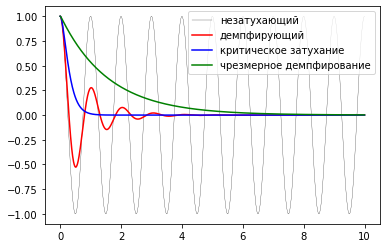

In [7]:
fir, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="незатухающий", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="демпфирующий")
ax.plot(t, y3[:,0], 'b', label="критическое затухание")
ax.plot(t, y4[:,0], 'g', label="чрезмерное демпфирование")
ax.legend();

In [8]:
# Решение задачи оптимизации
from scipy import optimize

In [9]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

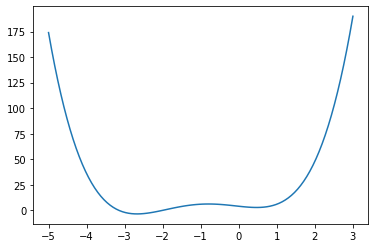

In [10]:
fig, ax = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x))

In [11]:
# Первый минимум
x_min = optimize.fmin_bfgs(f, -2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298155])

In [12]:
# Второй минимум
x_min = optimize.fmin_bfgs(f, 0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

In [13]:
optimize.brent(f)

0.46961743402759754

In [14]:
optimize.fminbound(f, -4, -2)

-2.672982383464819